C:\Users\16155\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error: 48.72764216140645


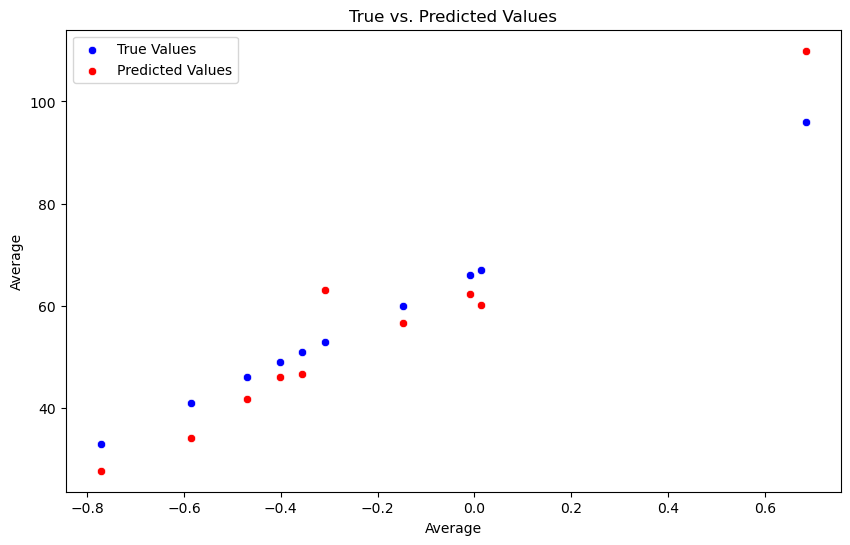

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

# Load the dataset
data = pd.read_csv('Air Pollution.csv')

# Remove rows with missing values
data = data.dropna()

# Split the dataset into features (X) and target (y)
X = data[['Average', 'Ozone']]
y = data['Average']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a neural network
model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=y_test, label='True Values', color='b')
sns.scatterplot(x=X_test[:, 0], y=y_pred, label='Predicted Values', color='r')
plt.xlabel('Average')
plt.ylabel('Average')
plt.legend()
plt.title('True vs. Predicted Values')
plt.show()


C:\Users\16155\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation Mean Squared Error: 17.958970954752477
Test Mean Squared Error: 3.31461870605215


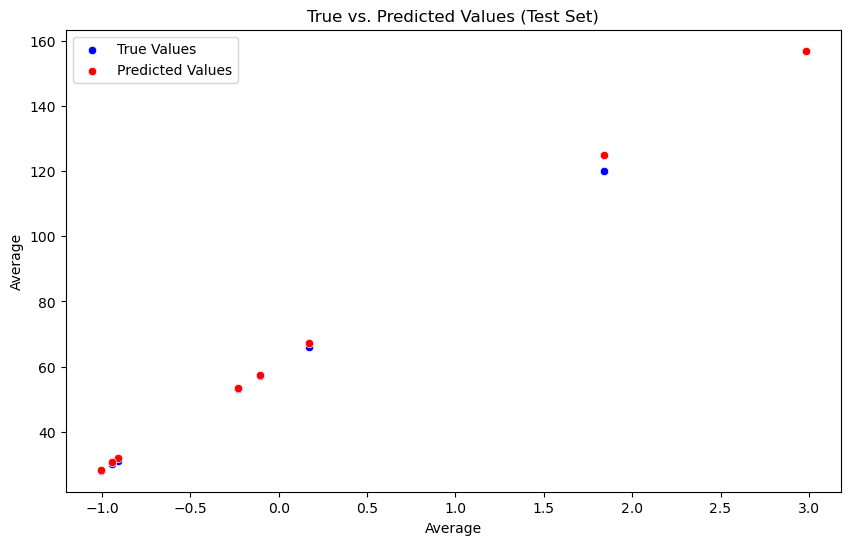

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

# Load the dataset
data = pd.read_csv('Air Pollution.csv')

# Data preprocessing
data = data.dropna()  # Remove rows with missing values
data = data.sample(frac=1, random_state=42)  # Shuffle the data
X = data[['Average', 'Ozone']].values
y = data['Average'].values

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create and train a more advanced neural network
model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    alpha=0.0001,
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate the mean squared error on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
print(f'Validation Mean Squared Error: {mse_val}')

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the mean squared error on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Test Mean Squared Error: {mse_test}')

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=y_test, label='True Values', color='b')
sns.scatterplot(x=X_test[:, 0], y=y_test_pred, label='Predicted Values', color='r')
plt.xlabel('Average')
plt.ylabel('Average')
plt.legend()
plt.title('True vs. Predicted Values (Test Set)')
plt.show()
